### Team Aluminum 

importing revelant libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder



import warnings
warnings.filterwarnings("ignore")


In [2]:
!ls ../../data


column_names.md   kc_house_data.csv


In [3]:
data = pd.read_csv('../../data/kc_house_data.csv')
#data.info()

In [4]:
#data.isna().sum()

Do we need Id? no, chao

In [5]:
data = data.drop(columns='id', axis=1)

In [6]:
#  # overwrite date col
# data['date'] = pd.to_datetime(data['date'])

# # creating 2 more col might mess up data.. idk
# data['Month'] = data['date'].apply(lambda date: date.month)
# data['Year'] = data['date'].apply(lambda date: date.year)


In [7]:
#data['price'].value_counts(ascending=False)


In [8]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [9]:
# replace Null values in dataframe with str NONE 

data['view'].fillna('NONE', inplace=True)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### Our main focus price

In [10]:
data['price'] = data['price'].map(lambda x: np.log(x))

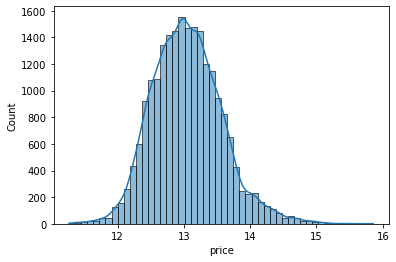

In [95]:
sns.histplot(data['price'],kde=True,bins=50);

### Simplyfing Grade to only 3 Low, Average and Excellent

#### do 3 splits
- 3-6
- 7
- 8-13

In [11]:
# Lows including 3 Poor, 5 Fair and 6 Low Average
data['grade'].replace('3 Poor','G_Low', inplace=True)
data['grade'].replace('5 Fair','G_Low', inplace=True)
data['grade'].replace('4 Low','G_Low', inplace=True)
data['grade'].replace('6 Low Average','G_Low', inplace=True)

#7 Average for Average
data['grade'].replace('7 Average','G_Average', inplace=True)

# Average Above including 8 Good,9 Better
data['grade'].replace('8 Good','G_Above_Ave', inplace=True)
data['grade'].replace('9 Better','G_Above_Ave', inplace=True)

# Excellent including 10 Very Good, 11 Excellent,12 Luxury and 13 Mansion
data['grade'].replace('10 Very Good','G_Excellent', inplace=True)
data['grade'].replace('11 Excellent','G_Excellent', inplace=True)
data['grade'].replace('12 Luxury','G_Excellent', inplace=True)
data['grade'].replace('13 Mansion','G_Excellent', inplace=True)

In [12]:
data['grade'].value_counts(normalize=True)

G_Average      0.415521
G_Above_Ave    0.401908
G_Low          0.106867
G_Excellent    0.075705
Name: grade, dtype: float64

### View Ideas

In [13]:
df_view_price = data[['price', 'view']].sort_values(by = 'price', ascending=False)
df_view_price

,price,view
7245,15.856731,GOOD
3910,15.769956,AVERAGE
9245,15.745582,EXCELLENT
4407,15.532906,NONE
1446,15.492607,EXCELLENT
...,...,...
2139,11.320554,NONE
8267,11.314475,NONE
16184,11.302204,NONE
465,11.289782,NONE


Comparing price/bedrooms with good average and no view. Potentially def function in utils.py

In [14]:
# data['view'].replace('NONE', '0',inplace=True)
# data['view'].replace('FAIR', '1',inplace=True)
# data['view'].replace('AVERAGE', '2',inplace=True)
# data['view'].replace('GOOD', '3',inplace=True)
# data['view'].replace('EXCELLENT', '4',inplace=True)

# data['view']=data['view'].astype(int)

# print('Good or Excellent View:')
# print(' 1 bedroom: ',data.loc[(data['view']>=3)&(data['bedrooms']==1)]['price'].mean())
# print(' 2 bedroom: ',data.loc[(data['view']>=3)&(data['bedrooms']==2)]['price'].mean())
# print(' 3 bedroom: ',data.loc[(data['view']>=3)&(data['bedrooms']==3)]['price'].mean())
# print(' 4 bedroom: ',data.loc[(data['view']>=3)&(data['bedrooms']==4)]['price'].mean())

# print('Average View')
# print(' 1 bedroom: ',data.loc[(data['view']==2)&(data['bedrooms']==1)]['price'].mean())
# print(' 2 bedroom: ',data.loc[(data['view']==2)&(data['bedrooms']==2)]['price'].mean())
# print(' 3 bedroom: ',data.loc[(data['view']==2)&(data['bedrooms']==3)]['price'].mean())
# print(' 4 bedroom: ',data.loc[(data['view']==2)&(data['bedrooms']==4)]['price'].mean())

# print('Fair or No view')
# print(' 1 bedroom w: ',data.loc[(data['view']<2)&(data['bedrooms']==1)]['price'].mean())
# print(' 2 bedroom w: ',data.loc[(data['view']<2)&(data['bedrooms']==2)]['price'].mean())
# print(' 3 bedroom w: ',data.loc[(data['view']<2)&(data['bedrooms']==3)]['price'].mean())
# print(' 4 bedroom w: ',data.loc[(data['view']<2)&(data['bedrooms']==4)]['price'].mean())

In [15]:
data.groupby(by=['view','bedrooms']).agg(['mean','count'])['price']

mean  count
view      bedrooms                  
AVERAGE   1         12.724647      7
          2         13.093434     97
          3         13.357990    378
          4         13.532099    331
          5         13.679703    117
          6         13.643498     22
          7         14.012079      4
          10        13.955273      1
EXCELLENT 1         12.967007      6
          2         13.693926     38
          3         13.966203    105
          4         14.078773    105
          5         14.277042     48
          6         14.294153     13
          7         14.314575      2
FAIR      1         12.481288      2
          2         13.051029     42
          3         13.372168    119
          4         13.586602    120
          5         13.800553     41
          6         13.412878      3
          7         13.768197      3
GOOD      1         13.294925      3
          2         13.321183     35
          3         13.443328    183
          4         13.739738    210
          5         13.925061     61
          6         14.041597     15
          8         14.493544      1
NONE      1         12.536854    178
          2         12.763496   2548
          3         12.891185   9039
          4         13.166301   6116
          5         13.294968   1334
          6         13.283823    219
          7         13.407667     29
          8         13.584142     12
          9         13.623684      6
          10        13.392361      2
          11        13.161584      1
          33        13.369223      1

### Condition 

Simplyfing condition to only 3 Low, Average and Good

In [16]:
data['condition'].value_counts(normalize=True)

Average      0.649164
Good         0.262861
Very Good    0.078761
Fair         0.007871
Poor         0.001343
Name: condition, dtype: float64

In [17]:
# Poor including Poor and Fair
data['condition'].replace('Poor','Cond_Poor', inplace=True)
data['condition'].replace('Fair','Cond_Poor', inplace=True)


#Average staying the same
data['condition'].replace('Average','Cond_Average', inplace=True)

# Good including Good and VeryGood
data['condition'].replace('Good','Cond_Good', inplace=True)
data['condition'].replace('Very Good','Cond_Good', inplace=True)

data['condition'].value_counts(normalize=True)

Cond_Average    0.649164
Cond_Good       0.341622
Cond_Poor       0.009214
Name: condition, dtype: float64

In [18]:
data.groupby(by=['condition','grade']).agg(['mean','count'])['price']


mean  count
condition    grade                        
Cond_Average G_Above_Ave  13.197145   6307
             G_Average    12.799845   5229
             G_Excellent  13.887152   1337
             G_Low        12.487388   1147
Cond_Good    G_Above_Ave  13.363703   2356
             G_Average    12.893246   3664
             G_Excellent  14.130999    296
             G_Low        12.565170   1062
Cond_Poor    G_Above_Ave  13.031338     17
             G_Average    12.647298     81
             G_Excellent  14.259868      2
             G_Low        12.323874     99

In [19]:
data.groupby(by=['grade']).agg(['mean','count'])['price']

,mean,count
grade,,
G_Above_Ave,13.242029,8680
G_Average,12.836603,8974
G_Excellent,13.931754,1635
G_Low,12.516165,2308


In [20]:
data.groupby(by=['condition']).agg(['mean','count'])['price']

,mean,count
condition,,
Cond_Average,13.056700,14020
Cond_Good,13.045910,7378
Cond_Poor,12.535413,199


In [21]:
data['grade'].value_counts(normalize=True)

G_Average      0.415521
G_Above_Ave    0.401908
G_Low          0.106867
G_Excellent    0.075705
Name: grade, dtype: float64

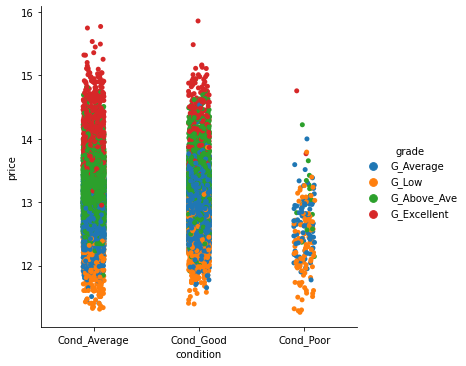

In [22]:
sns.catplot(x='condition',y='price', hue = "grade", data=data)

### We can say that Low grade have a big discount, oposite of Excellent 

## VIEW

In [23]:

# (1) Create a variable view
# extracted from X_train
# (double brackets due to shape expected by OHE)
ex_train = data[["view"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False)

# (3) Fit the encoder on train
ohe.fit(ex_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], dtype=object)]

In [24]:
ex_encoded_train = ohe.transform(ex_train)

# Visually inspect fireplace_qu_encoded_train
ex_encoded_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [25]:
# (5a) Make the transformed data into a dataframe

ex_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    ex_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index= data.index
)

# Visually inspect new dataframe
ex_encoded_train

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0
21593,0.0,0.0,0.0,0.0,1.0
21594,0.0,0.0,0.0,0.0,1.0
21595,0.0,0.0,0.0,0.0,1.0


In [26]:
# (5c) Concatenate the new dataframe with current X_train
data = pd.concat([data, ex_encoded_train], axis=1)

# Visually inspect data
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
0,10/13/2014,12.309982,3,1.00,1180,5650,1.0,NaN,NONE,Cond_Average,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,0.0,1.0
1,12/9/2014,13.195614,3,2.25,2570,7242,2.0,NO,NONE,Cond_Average,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,0.0,1.0
2,2/25/2015,12.100712,2,1.00,770,10000,1.0,NO,NONE,Cond_Average,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,0.0,1.0
3,12/9/2014,13.311329,4,3.00,1960,5000,1.0,NO,NONE,Cond_Good,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,1.0
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,NO,NONE,Cond_Average,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,12.793859,3,2.50,1530,1131,3.0,NO,NONE,Cond_Average,...,98103,47.6993,-122.346,1530,1509,0.0,0.0,0.0,0.0,1.0
21593,2/23/2015,12.899220,4,2.50,2310,5813,2.0,NO,NONE,Cond_Average,...,98146,47.5107,-122.362,1830,7200,0.0,0.0,0.0,0.0,1.0
21594,6/23/2014,12.904459,2,0.75,1020,1350,2.0,NO,NONE,Cond_Average,...,98144,47.5944,-122.299,1020,2007,0.0,0.0,0.0,0.0,1.0
21595,1/16/2015,12.899220,3,2.50,1600,2388,2.0,NaN,NONE,Cond_Average,...,98027,47.5345,-122.069,1410,1287,0.0,0.0,0.0,0.0,1.0


In [27]:
View_first = ols(formula = "price ~ EXCELLENT+FAIR+GOOD+AVERAGE", data= data).fit()

In [28]:
View_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     754.2
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:18:50   Log-Likelihood:                -15380.
No. Observations:               21597   AIC:                         3.077e+04
Df Residuals:                   21592   BIC:                         3.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9912      0.004   3676.328      0.000      12.984      12.998
EXCELLENT      1.0235      0.028     36.645      0.000       0.969       1.078
FAIR           0.4699      0.027     17.160      0.000       0.416       0.524
GOOD           0.6430      0.022     29.004      0.000       0.600       0.686
AVERAGE        0.4448      0.016     27.237      0.000       0.413       0.477
==============================================================================
Omnibus:                      364.552   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.112
Skew:                           0.266   Prob(JB):                     1.79e-93
Kurtosis:                       3.437   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
View_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     754.2
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:18:50   Log-Likelihood:                -15380.
No. Observations:               21597   AIC:                         3.077e+04
Df Residuals:                   21592   BIC:                         3.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9912      0.004   3676.328      0.000      12.984      12.998
EXCELLENT      1.0235      0.028     36.645      0.000       0.969       1.078
FAIR           0.4699      0.027     17.160      0.000       0.416       0.524
GOOD           0.6430      0.022     29.004      0.000       0.600       0.686
AVERAGE        0.4448      0.016     27.237      0.000       0.413       0.477
==============================================================================
Omnibus:                      364.552   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.112
Skew:                           0.266   Prob(JB):                     1.79e-93
Kurtosis:                       3.437   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

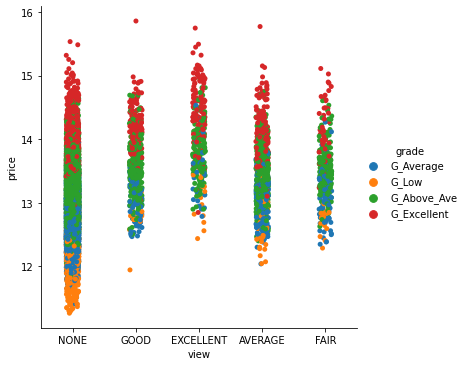

In [30]:
sns.catplot(x='view',y='price', hue='grade',data=data)

In [31]:
view_ave= ols(formula = "price ~ AVERAGE", data= data).fit()

view_ave.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     557.2
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.21e-121
Time:                        19:18:52   Log-Likelihood:                -16517.
No. Observations:               21597   AIC:                         3.304e+04
Df Residuals:                   21595   BIC:                         3.305e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0302      0.004   3600.681      0.000      13.023      13.037
AVERAGE        0.4058      0.017     23.604      0.000       0.372       0.439
==============================================================================
Omnibus:                      872.420   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1136.078
Skew:                           0.429   Prob(JB):                    2.01e-247
Kurtosis:                       3.726   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
view_ex= ols(formula = "price ~ EXCELLENT", data= data).fit()

view_ex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1141.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          8.76e-244
Time:                        19:18:52   Log-Likelihood:                -16236.
No. Observations:               21597   AIC:                         3.248e+04
Df Residuals:                   21595   BIC:                         3.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0338      0.004   3704.965      0.000      13.027      13.041
EXCELLENT      0.9808      0.029     33.779      0.000       0.924       1.038
==============================================================================
Omnibus:                      551.880   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.359
Skew:                           0.342   Prob(JB):                    1.09e-143
Kurtosis:                       3.514   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Condition 

In [33]:
data_wo_none = data.drop(data[data.view == "NONE"].index)

In [34]:
data.view

0        NONE
1        NONE
2        NONE
3        NONE
4        NONE
         ... 
21592    NONE
21593    NONE
21594    NONE
21595    NONE
21596    NONE
Name: view, Length: 21597, dtype: object

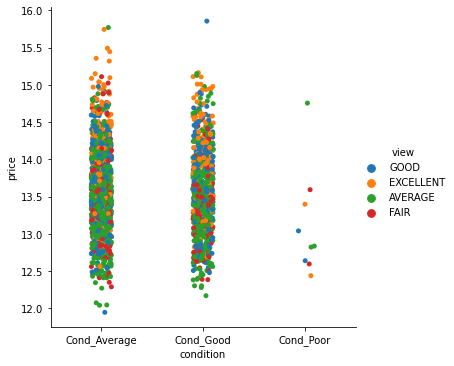

In [35]:
sns.catplot(x='condition',y='price', hue='view',data=data_wo_none)

# Condition is going to take us nowhere

In [37]:
data['condition'].value_counts(normalize=True)

Cond_Average    0.649164
Cond_Good       0.341622
Cond_Poor       0.009214
Name: condition, dtype: float64

In [38]:
# (1) Create a variable ex_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
con_train = data[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",handle_unknown="ignore", sparse=False)

# (3) Fit the encoder on con_train
ohe.fit(con_train)

# Inspect the categories of the fitted encoder
ohe.categories_


[array(['Cond_Average', 'Cond_Good', 'Cond_Poor'], dtype=object)]

Notice the white space between Very and Good

In [39]:
con_encoded_train = ohe.transform(con_train)

# Visually inspect encoded_train
con_encoded_train


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [40]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
0,10/13/2014,12.309982,3,1.00,1180,5650,1.0,NaN,NONE,Cond_Average,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,0.0,1.0
1,12/9/2014,13.195614,3,2.25,2570,7242,2.0,NO,NONE,Cond_Average,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,0.0,1.0
2,2/25/2015,12.100712,2,1.00,770,10000,1.0,NO,NONE,Cond_Average,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,0.0,1.0
3,12/9/2014,13.311329,4,3.00,1960,5000,1.0,NO,NONE,Cond_Good,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,1.0
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,NO,NONE,Cond_Average,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,0.0,1.0


In [41]:
# (5a) Make the transformed data into a dataframe

con_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    con_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index= data.index
)

# Visually inspect new dataframe
con_encoded_train

,Cond_Average,Cond_Good,Cond_Poor
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
21592,1.0,0.0,0.0
21593,1.0,0.0,0.0
21594,1.0,0.0,0.0
21595,1.0,0.0,0.0


In [42]:
# (5c) Concatenate the new dataframe with current X_train
data = pd.concat([data, con_encoded_train], axis=1)

# Visually inspect data
data


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Cond_Average,Cond_Good,Cond_Poor
0,10/13/2014,12.309982,3,1.00,1180,5650,1.0,NaN,NONE,Cond_Average,...,1340,5650,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12/9/2014,13.195614,3,2.25,2570,7242,2.0,NO,NONE,Cond_Average,...,1690,7639,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2/25/2015,12.100712,2,1.00,770,10000,1.0,NO,NONE,Cond_Average,...,2720,8062,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,12/9/2014,13.311329,4,3.00,1960,5000,1.0,NO,NONE,Cond_Good,...,1360,5000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,NO,NONE,Cond_Average,...,1800,7503,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,12.793859,3,2.50,1530,1131,3.0,NO,NONE,Cond_Average,...,1530,1509,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
21593,2/23/2015,12.899220,4,2.50,2310,5813,2.0,NO,NONE,Cond_Average,...,1830,7200,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
21594,6/23/2014,12.904459,2,0.75,1020,1350,2.0,NO,NONE,Cond_Average,...,1020,2007,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
21595,1/16/2015,12.899220,3,2.50,1600,2388,2.0,NaN,NONE,Cond_Average,...,1410,1287,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [43]:
condition_first = ols(formula = "price ~ Cond_Average+Cond_Good+Cond_Poor", data= data).fit()

condition_first.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     22.22
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.31e-14
Time:                        19:18:53   Log-Likelihood:                -16759.
No. Observations:               21597   AIC:                         3.353e+04
Df Residuals:                   21593   BIC:                         3.356e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.082e+11   3.57e+11      0.864      0.388   -3.91e+11    1.01e+12
Cond_Average -3.082e+11   3.57e+11     -0.864      0.388   -1.01e+12    3.91e+11
Cond_Good    -3.082e+11   3.57e+11     -0.864      0.388   -1.01e+12    3.91e+11
Cond_Poor    -3.082e+11   3.57e+11     -0.864      0.388   -1.01e+12    3.91e+11
==============================================================================
Omnibus:                      874.804   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1109.260
Skew:                           0.440   Prob(JB):                    1.34e-241
Kurtosis:                       3.678   Cond. No.                     2.49e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.43e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
ave_price= ols(formula = "price ~ Cond_Average", data= data).fit()

ave_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.39
Date:                Tue, 05 Oct 2021   Prob (F-statistic):            0.00127
Time:                        19:18:53   Log-Likelihood:                -16787.
No. Observations:               21597   AIC:                         3.358e+04
Df Residuals:                   21595   BIC:                         3.359e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0325      0.006   2154.901      0.000      13.021      13.044
Cond_Average     0.0242      0.008      3.224      0.001       0.009       0.039
==============================================================================
Omnibus:                      869.015   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1110.299
Skew:                           0.435   Prob(JB):                    7.97e-242
Kurtosis:                       3.691   Cond. No.                         3.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Grade

In [45]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Cond_Average,Cond_Good,Cond_Poor
0,10/13/2014,12.309982,3,1.00,1180,5650,1.0,NaN,NONE,Cond_Average,...,1340,5650,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12/9/2014,13.195614,3,2.25,2570,7242,2.0,NO,NONE,Cond_Average,...,1690,7639,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2/25/2015,12.100712,2,1.00,770,10000,1.0,NO,NONE,Cond_Average,...,2720,8062,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,12/9/2014,13.311329,4,3.00,1960,5000,1.0,NO,NONE,Cond_Good,...,1360,5000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,NO,NONE,Cond_Average,...,1800,7503,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


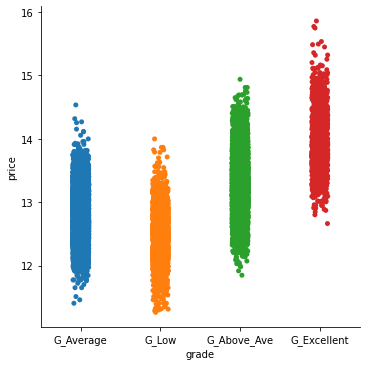

In [46]:
sns.catplot(x='grade',y='price',data=data)

In [47]:
data['grade'].value_counts(normalize=True)

G_Average      0.415521
G_Above_Ave    0.401908
G_Low          0.106867
G_Excellent    0.075705
Name: grade, dtype: float64

In [48]:
# (1) Create a variable ex_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
grade_train = data[["grade"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",handle_unknown="ignore", sparse=False)

# (3) Fit the encoder on con_train
ohe.fit(grade_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['G_Above_Ave', 'G_Average', 'G_Excellent', 'G_Low'], dtype=object)]

In [49]:
grade_encoded_train = ohe.transform(grade_train)

# Visually inspect encoded_train
grade_encoded_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [50]:
# (5a) Make the transformed data into a dataframe

grade_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match 's index
    index= data.index
)

# Visually inspect new dataframe
grade_encoded_train

,G_Above_Ave,G_Average,G_Excellent,G_Low
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
21592,1.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0
21594,0.0,1.0,0.0,0.0
21595,1.0,0.0,0.0,0.0


In [51]:
# (5c) Concatenate the new dataframe with current X_train
data = pd.concat([data, grade_encoded_train], axis=1)

# Visually inspect data
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,FAIR,GOOD,NONE,Cond_Average,Cond_Good,Cond_Poor,G_Above_Ave,G_Average,G_Excellent,G_Low
0,10/13/2014,12.309982,3,1.00,1180,5650,1.0,NaN,NONE,Cond_Average,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12/9/2014,13.195614,3,2.25,2570,7242,2.0,NO,NONE,Cond_Average,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2/25/2015,12.100712,2,1.00,770,10000,1.0,NO,NONE,Cond_Average,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12/9/2014,13.311329,4,3.00,1960,5000,1.0,NO,NONE,Cond_Good,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,NO,NONE,Cond_Average,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,12.793859,3,2.50,1530,1131,3.0,NO,NONE,Cond_Average,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
21593,2/23/2015,12.899220,4,2.50,2310,5813,2.0,NO,NONE,Cond_Average,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
21594,6/23/2014,12.904459,2,0.75,1020,1350,2.0,NO,NONE,Cond_Average,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,1/16/2015,12.899220,3,2.50,1600,2388,2.0,NaN,NONE,Cond_Average,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [87]:
grade_first = ols(formula = "price ~ G_Above_Ave+G_Average+G_Excellent", data= data).fit()

grade_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     5744.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:36:11   Log-Likelihood:                -10456.
No. Observations:               21597   AIC:                         2.092e+04
Df Residuals:                   21593   BIC:                         2.095e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.5162      0.008   1531.146      0.000      12.500      12.532
G_Above_Ave     0.7259      0.009     78.923      0.000       0.708       0.744
G_Average       0.3204      0.009     34.961      0.000       0.302       0.338
G_Excellent     1.4156      0.013    111.514      0.000       1.391       1.440
==============================================================================
Omnibus:                      170.438   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.631
Skew:                           0.200   Prob(JB):                     1.62e-39
Kurtosis:                       3.196   Cond. No.                         7.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
test_price= ols(formula = "price ~ G_Excellent", data= data).fit()

test_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     6473.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:33:35   Log-Likelihood:                -13961.
No. Observations:               21597   AIC:                         2.793e+04
Df Residuals:                   21595   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.9758      0.003   3969.304      0.000      12.969      12.982
G_Excellent     0.9559      0.012     80.456      0.000       0.933       0.979
==============================================================================
Omnibus:                       82.889   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.547
Skew:                           0.128   Prob(JB):                     9.76e-20
Kurtosis:                       3.179   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
data_grade = data[['G_Above_Ave','G_Average','G_Excellent','price']]
#price being my y, x being everything else except price/
y = data_grade['price']
X = data_grade.drop(columns='price', axis=1)


# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)



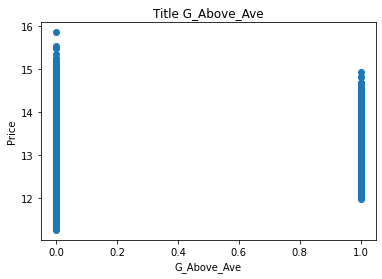

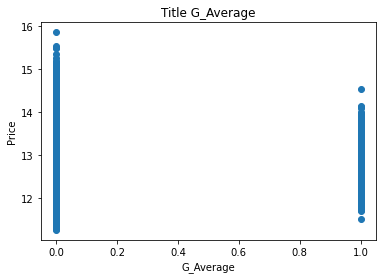

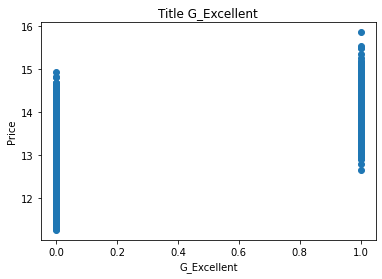

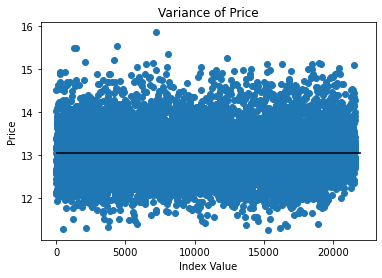

In [94]:
features = X_train.columns

for x in features:
    plt.scatter(X_train[x], y_train)
    plt.title(f'Title {x}')
    plt.xlabel(x)
    plt.ylabel('Price')
    plt.show()
    
# also plot sales against itself
plt.scatter(y_train.index, y_train)
plt.hlines(y_train.mean(), 0, 22000, colors= 'black' )
plt.xlabel('Index Value')
plt.ylabel('Price')
plt.title('Variance of Price')
plt.show()

In [55]:
df = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.7) & (df.cc<1)]

,cc
pairs,
"(Cond_Average, Cond_Good)",0.979851
"(sqft_living, sqft_above)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot15, sqft_lot)",0.718204


In [58]:
df_view_price = data[['price', 'view']].sort_values(by = 'price', ascending=False)
df_view_price

,price,view
7245,15.856731,GOOD
3910,15.769956,AVERAGE
9245,15.745582,EXCELLENT
4407,15.532906,NONE
1446,15.492607,EXCELLENT
...,...,...
2139,11.320554,NONE
8267,11.314475,NONE
16184,11.302204,NONE
465,11.289782,NONE


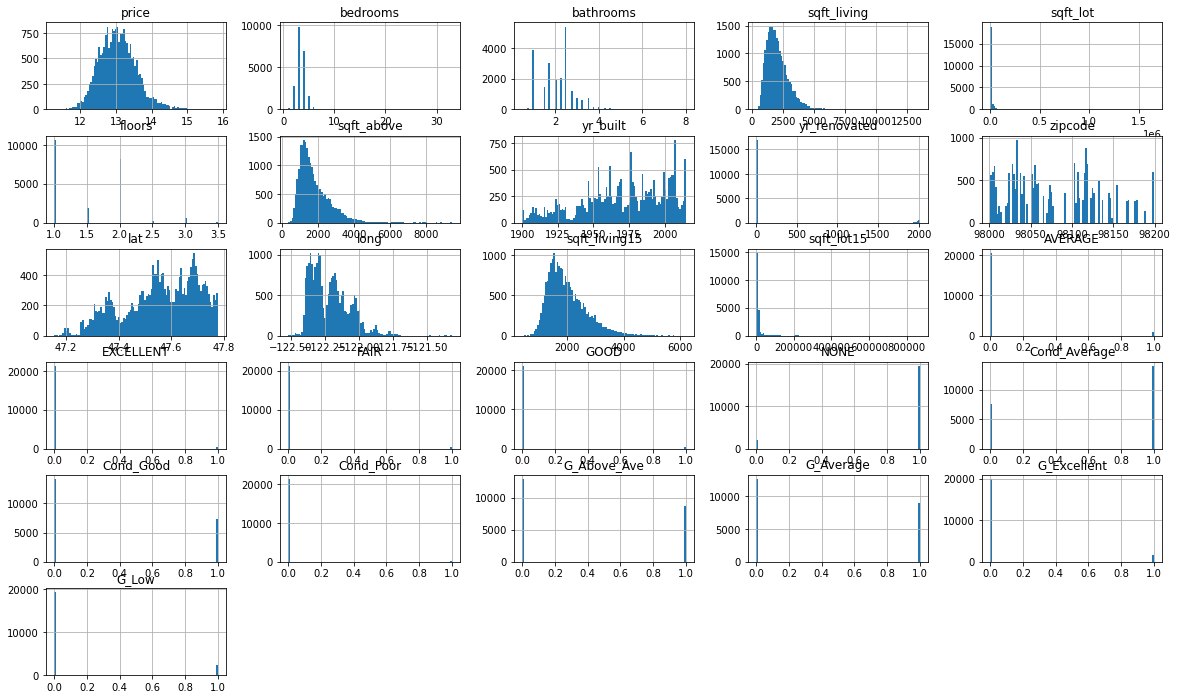

In [59]:
data.hist(bins=100, figsize=(20, 12));

- Look at = sqft_living15, sqft_above, sqft_living, price ofc ..... Maybe see long location = more $$ ?
- Also look at bedroom, 1 random 30...

<AxesSubplot:>

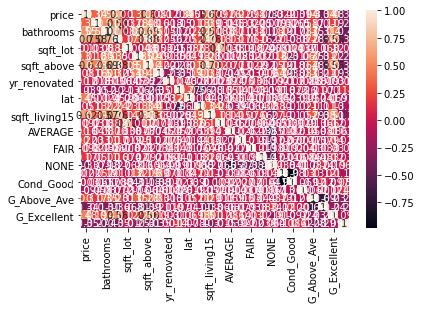

In [60]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [61]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,...,FAIR,GOOD,NONE,Cond_Average,Cond_Good,Cond_Poor,G_Above_Ave,G_Average,G_Excellent,G_Low
price,1.000000,0.343360,0.551249,0.695185,0.100025,0.310630,0.601579,0.080583,0.118174,-0.038788,...,0.097672,0.172711,-0.329030,0.021932,-0.003148,-0.093919,0.301745,-0.338852,0.480232,-0.349526
bedrooms,0.343360,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,...,0.021943,0.049942,-0.079232,0.005210,0.006486,-0.058212,0.173697,-0.104791,0.192528,-0.273341
bathrooms,0.551249,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,...,0.037935,0.111907,-0.175884,0.190790,-0.174524,-0.086684,0.349793,-0.313457,0.403277,-0.400396
sqft_living,0.695185,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,...,0.066582,0.158322,-0.268465,0.102061,-0.088212,-0.071921,0.277106,-0.358915,0.558513,-0.345449
sqft_lot,0.100025,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,...,-0.008208,0.074124,-0.068216,-0.011589,0.004121,0.037428,0.011105,-0.067791,0.117665,-0.010233
floors,0.310630,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,...,-0.023468,0.020380,-0.016311,0.317725,-0.307631,-0.060007,0.346887,-0.308247,0.222227,-0.249075
sqft_above,0.601579,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,...,0.022144,0.091583,-0.151909,0.194238,-0.182604,-0.063803,0.282950,-0.387255,0.557131,-0.308331
yr_built,0.080583,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,...,-0.034386,-0.019073,0.063826,0.391418,-0.377487,-0.081348,0.329632,-0.211966,0.187548,-0.345582
yr_renovated,0.118174,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,...,0.030340,0.060635,-0.090271,0.071255,-0.069915,-0.008829,0.018109,-0.018793,0.003066,-0.001411
zipcode,-0.038788,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,...,0.042930,0.040933,-0.091365,0.017704,-0.023120,0.026331,-0.106619,0.070285,-0.100557,0.143184


## First Attempt to do 

Not trying to break the data set, creating new data set to experiment with only "price", "sqft_living15", "sqft_above", "sqft_living"

In [62]:
#data = pd.read_csv('data/kc_house_data.csv')
#data.head()
# sns.pairplot(data)
# plt.show()


In [63]:
data['sqft_above'] = data['sqft_above'].map(lambda x: np.log(x))
data['sqft_living'] = data['sqft_living'].map(lambda x: np.log(x))
#I had alreado log price

data_1 = data[["price", "sqft_above", "sqft_living"]]
data_1.head()


,price,sqft_above,sqft_living
0,12.309982,7.073270,7.073270
1,13.195614,7.682482,7.851661
2,12.100712,6.646391,6.646391
3,13.311329,6.956545,7.580700
4,13.142166,7.426549,7.426549


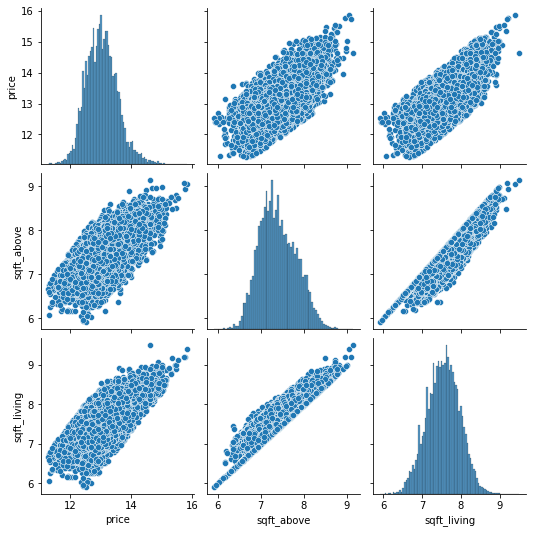

In [64]:
sns.pairplot(data_1)
plt.show()

In [65]:
data_1.corr()

,price,sqft_above,sqft_living
price,1.000000,0.586013,0.674802
sqft_above,0.586013,1.000000,0.864979
sqft_living,0.674802,0.864979,1.000000


In [66]:
first_try = ols(formula = "price ~ sqft_above+sqft_living", data= data).fit()

first_try.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     9028.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:19:11   Log-Likelihood:                -10230.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21594   BIC:                         2.049e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7141      0.048    139.255      0.000       6.620       6.809
sqft_above      0.0114      0.012      0.922      0.357      -0.013       0.036
sqft_living     0.8277      0.012     66.629      0.000       0.803       0.852
==============================================================================
Omnibus:                      125.127   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.199
Skew:                           0.143   Prob(JB):                     9.66e-26
Kurtosis:                       2.785   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#price being my y, x being everything else except price/
y = data_1['price']
X = data_1.drop(columns='price', axis=1)


# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


### Checking Each Assumption

using scatterplots - plotting the dependent variable against every independent variable
calculating correlations

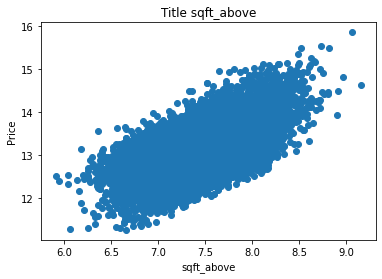

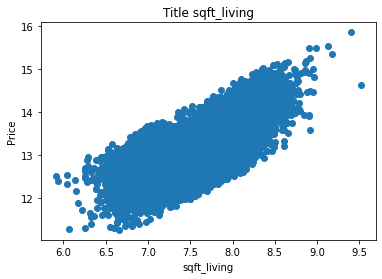

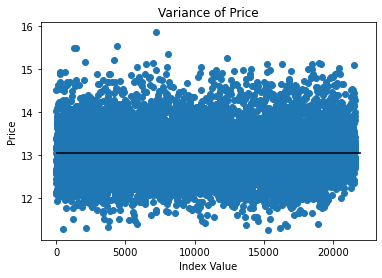

In [68]:
features = X_train.columns

for x in features:
    plt.scatter(X_train[x], y_train)
    plt.title(f'Title {x}')
    plt.xlabel(x)
    plt.ylabel('Price')
    plt.show()
    
# also plot sales against itself
plt.scatter(y_train.index, y_train)
plt.hlines(y_train.mean(), 0, 22000, colors= 'black' )
plt.xlabel('Index Value')
plt.ylabel('Price')
plt.title('Variance of Price')
plt.show()

In [69]:
# Make a train df so we can see X versus y in our train data
train_df = pd.concat([X_train, y_train], axis=1)

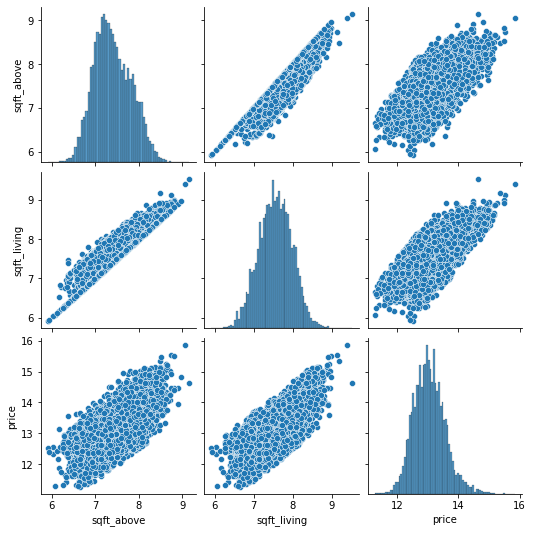

In [70]:
sns.pairplot(train_df)
plt.show()

In [71]:
# check correlations just against sales
train_df.corr().price.sort_values(ascending=False)

price          1.000000
sqft_living    0.675303
sqft_above     0.588237
Name: price, dtype: float64

In [72]:
data_1.corr().price.sort_values(ascending=False)

price          1.000000
sqft_living    0.674802
sqft_above     0.586013
Name: price, dtype: float64

Not much change after train 

In [73]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

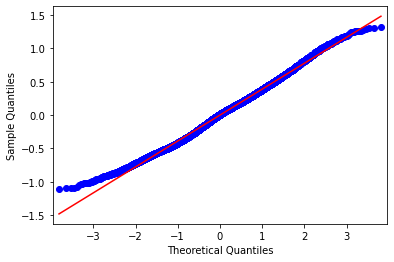

In [74]:
# QQ plots checking for normality.


# Calculate our residuals
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

sm.qqplot(train_residuals, line = 'r');